# KOUSALYA DEEPAK

## TASK-2 Prediction using Supervised ML

### OBJECTIVE
#### Predict the percentage of marks of an student based on the number of study hours using simple linear regression

### Importing all libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Reading Dataset

In [28]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("successful")

successful


In [30]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
data.shape

(25, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A69E6E888>,
      dtype=object)

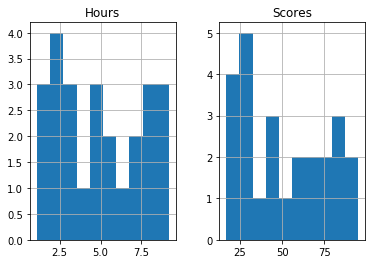

In [33]:
data.hist()

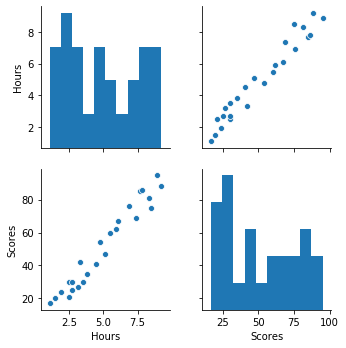

In [34]:
sns.pairplot(data)

### Distribution of Scores and Hours

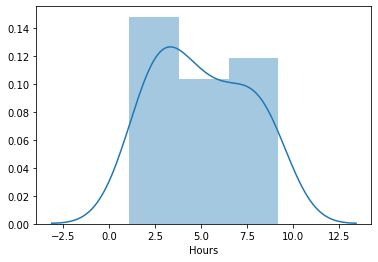

In [35]:
sns.distplot(data['Hours'])

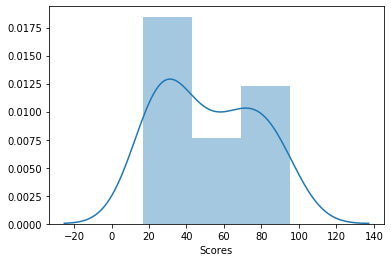

In [36]:
sns.distplot(data['Scores'])

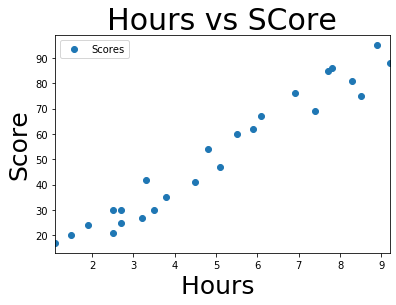

In [73]:
data.plot(x='Hours', y='Scores',style='o')
plt.title('Hours vs SCore',fontsize=30)
plt.xlabel('Hours ',fontsize=25)
plt.ylabel('Score',fontsize=25)
plt.show()

#### From the graph,we can understand that there is a positive linear relation between the number of hours studied and the percentage score

### Preparing the data

In [38]:
x = data.iloc[:,:1].values
y = data.iloc[:,1:2].values

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [40]:
print("Shape of x train data:",x_train.shape)
print("Shape of y train data:",y_train.shape)
print("Shape of x test data:",x_test.shape)
print("Shape of y test data:",y_test.shape)

Shape of x train data: (17, 1)
Shape of y train data: (17, 1)
Shape of x test data: (8, 1)
Shape of y test data: (8, 1)


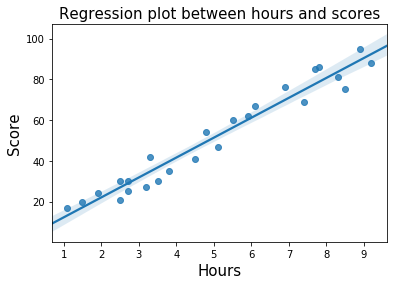

In [45]:
sns.regplot(x='Hours', y='Scores',data=data)
plt.title('Regression plot between hours and scores',fontsize=15)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.show()

### Applying linear regression

In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train Data

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
predict = model.predict(x_train)
print("MeanSquared for Train data:",round(mean_squared_error(predict,y_train),3))

MeanSquared for Train data: 31.398


### Test Data

In [58]:
predict = model.predict(x_test)
print("MeanSquared for test data:",round(mean_squared_error(predict,y_test),3))

MeanSquared for test data: 23.619


### Actual and Predict values

In [59]:
pre=pd.Series(predict.ravel())
y_test = pd.Series(y_test.ravel())
concat = [pre,y_test]

In [60]:
z = pd.concat(concat,axis=1,keys=['predict','actual'])
z.head()

,predict,actual
0,83.391686,81
1,27.070549,30
2,27.070549,21
3,69.796929,76
4,60.086388,62


### Plotting graph for actual and predict values

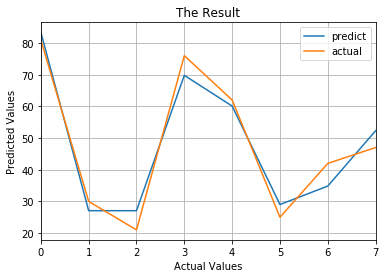

In [61]:
z.plot()
plt.grid()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("The Result")
plt.show()

### Regression plot between predicted values and actual values

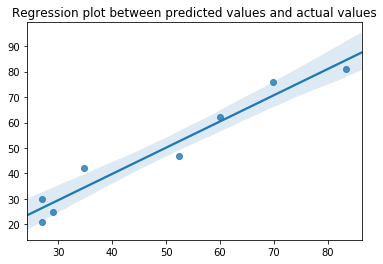

In [74]:
sns.regplot(predict,y_test)
plt.title("Regression plot between predicted values and actual values")
plt.show()

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [70]:
z = model.predict([[9.25]])
print(z) 

[[92.61670034]]


## The predicted score if a student studies for 9.25 hrs/ day will be 92.6 %